In [12]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# Define column names
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

# Load dataset
pima = pd.read_csv("diabetes.csv", header=None, names=col_names)


# Load the dataset
# If your CSV already has headers, do NOT use header=None
pima = pd.read_csv("diabetes.csv")

# Optional: rename columns for convenience
pima.columns = ['pregnant', 'glucose', 'bp', 'skin', 'insulin',
                'bmi', 'pedigree', 'age', 'label']

In [14]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
# Define feature columns and target
feature_cols = ['glucose']
X = pima[feature_cols]
y = pima['label']


In [16]:
# Split X and y into training and test sets
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=16)


In [17]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

d:\MLL\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
d:\MLL\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


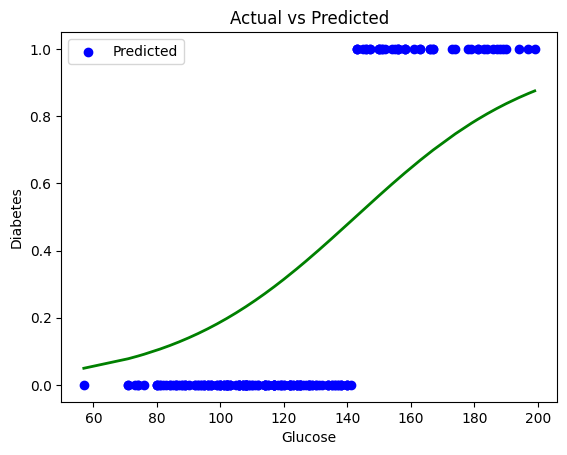

In [18]:

# Sort the test data for plotting
X_test_sorted = np.sort(X_test.values.flatten())
y_prob_sorted = logreg.predict_proba(X_test_sorted.reshape(-1, 1))[:, 1]
y_pred_sorted = logreg.predict(X_test_sorted.reshape(-1, 1))

#plt.scatter(X_test, y_test, color='red', label='Actual')
plt.scatter(X_test, y_pred, color='blue', label='Predicted')
plt.xlabel('Glucose')
plt.ylabel('Diabetes')
plt.title('Actual vs Predicted')
plt.legend()
plt.plot(X_test_sorted, y_prob_sorted, color='green', linewidth=2, label='Best-fit Sigmoid Curve')
plt.show()

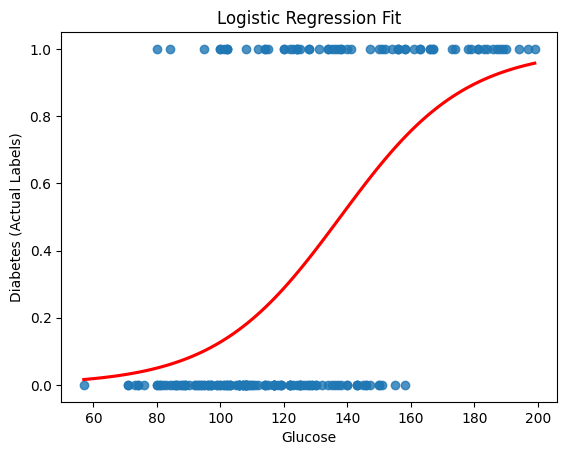

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(x=X_test['glucose'], y=y_test, logistic=True, ci=None, line_kws={"color": "red"})

plt.xlabel('Glucose')
plt.ylabel('Diabetes (Actual Labels)')
plt.title('Logistic Regression Fit')
plt.show()


In [20]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[113,  12],
       [ 34,  33]])

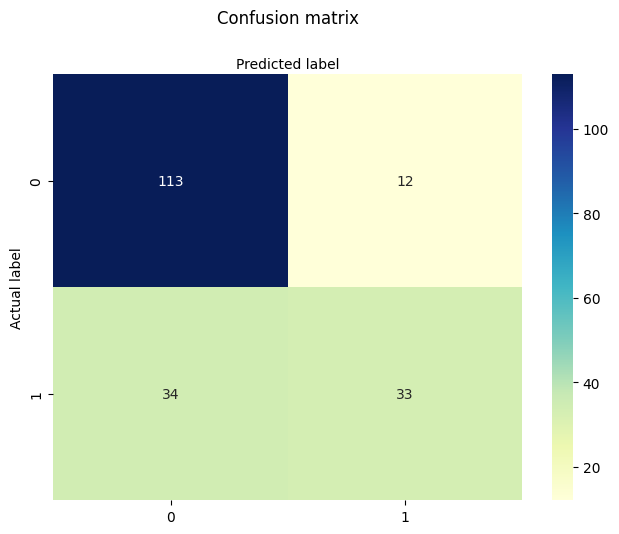

In [21]:
class_names = [0, 1]  # names of classes

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g', ax=ax)

ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

plt.show()

In [22]:
from sklearn.metrics import classification_report
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.77      0.90      0.83       125
   with diabetes       0.73      0.49      0.59        67

        accuracy                           0.76       192
       macro avg       0.75      0.70      0.71       192
    weighted avg       0.76      0.76      0.75       192

